# Keras Project 

## The Data

The data is a  subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Description of Data set

#### feature information function on the data as a .csv file for easy lookup throughout the notebook:

In [3]:
import pandas as pd

In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
# check info of particular column
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


## Load the data and other imports

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [80]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [81]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [82]:
# 396,029 rows and nulls present in data set & 27 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00



# Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


In [84]:
# check null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

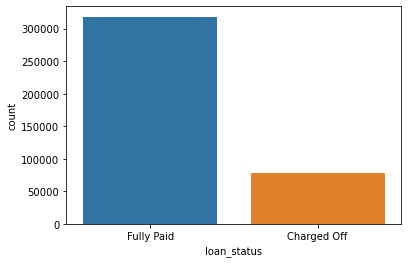

In [85]:
# see most loans have been paid off
sns.countplot(x="loan_status",data=df)

**Create a histogram of the loan_amnt column.**

(array([2.7420e+03, 7.4500e+03, 1.0489e+04, 1.2791e+04, 2.0755e+04,
        2.2033e+04, 1.6495e+04, 2.1415e+04, 1.4714e+04, 3.7229e+04,
        1.2498e+04, 2.7261e+04, 9.8230e+03, 1.0588e+04, 2.6409e+04,
        1.4103e+04, 7.0870e+03, 1.3769e+04, 5.8370e+03, 2.2546e+04,
        8.0130e+03, 4.7010e+03, 3.7470e+03, 1.0780e+04, 1.1336e+04,
        2.2570e+03, 2.1860e+03, 6.9460e+03, 1.4940e+03, 8.0720e+03,
        8.9700e+02, 1.9290e+03, 1.2930e+03, 1.0300e+03, 1.5054e+04,
        5.0000e+01, 1.2000e+01, 8.0000e+00, 6.0000e+00, 1.8500e+02]),
 array([  500. ,  1487.5,  2475. ,  3462.5,  4450. ,  5437.5,  6425. ,
         7412.5,  8400. ,  9387.5, 10375. , 11362.5, 12350. , 13337.5,
        14325. , 15312.5, 16300. , 17287.5, 18275. , 19262.5, 20250. ,
        21237.5, 22225. , 23212.5, 24200. , 25187.5, 26175. , 27162.5,
        28150. , 29137.5, 30125. , 31112.5, 32100. , 33087.5, 34075. ,
        35062.5, 36050. , 37037.5, 38025. , 39012.5, 40000. ]),
 <BarContainer object of 40 artists

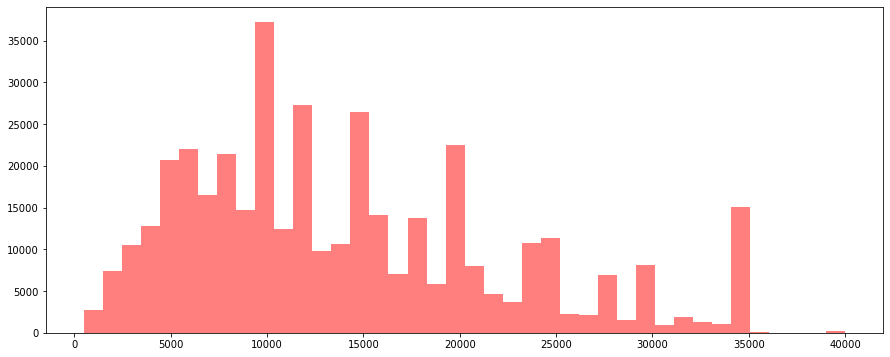

In [86]:
# Most loans at 5-15kish
plt.figure(figsize=(15,6))
plt.hist(x="loan_amnt",data=df,bins=40,alpha=0.5,color="r")

**Calculate the correlation between all continuous numeric variables using .corr() method.**

In [87]:
# Chec correlation
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualize this using a heatmap**


<AxesSubplot:>

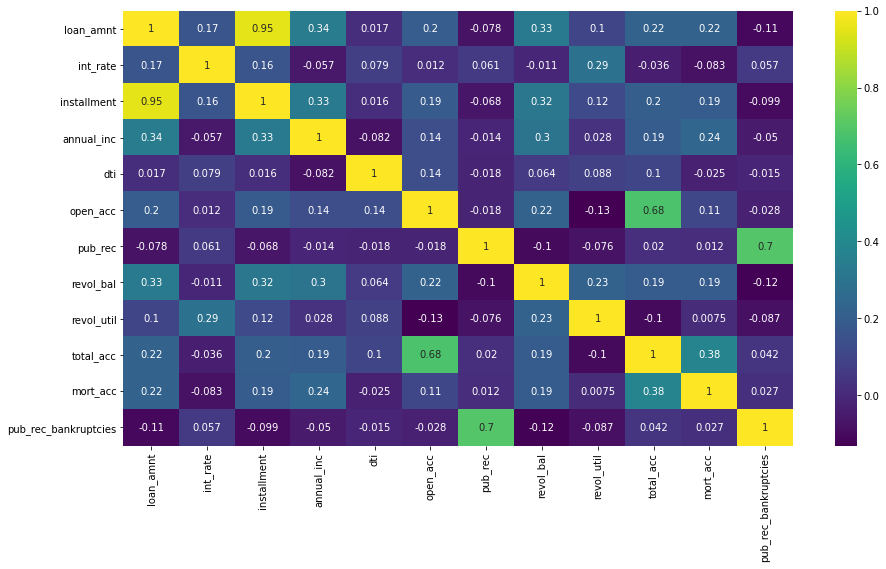

In [88]:

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

#### Almost perfect corelation between loan_amnt and installment
    they seem very similar features => makes sense as the higher your loan the more montyly payments will be 
    => Not double up becauses could be 36 or 60 month contract

In [89]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


In [90]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

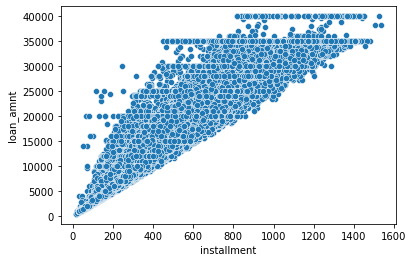

In [91]:
# scatter plot, see very strong corelation (linear) of investment vs loan amount
sns.scatterplot(x="installment",y="loan_amnt",data=df)

**boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

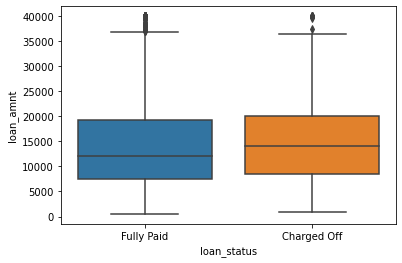

In [92]:
# See very similar distrubutions!!! so maybe not so good feature??
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

**Summary statistics for the loan amount, grouped by the loan_status.**

In [93]:
# 2000 descrepancy  in mean size of loan
df.groupby("loan_status").describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Explore grade and subgrade columns**

In [94]:
# get list of all possible grades
sorted(list(df["grade"].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [95]:
#list of all possible subgrades
np.sort(list(df["sub_grade"].unique()))

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype='<U2')

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

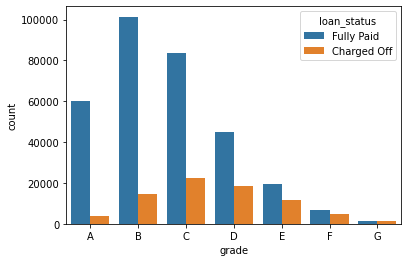

In [96]:
# Looks like normal distribution for both actuallt
# use order to order plots use sorted() to sort values
sorted_grades = np.sort(df["grade"].unique())
sns.countplot(x="grade",hue="loan_status",data=df,order=sorted_grades)

**Plot out subgrades**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

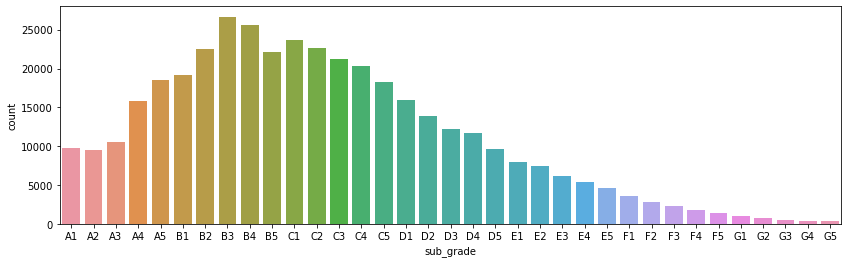

In [97]:
# sorted() to sort array!!!!! or use np.sort(x)
plt.figure(figsize=(14,4))
sorted_subgrades = sorted(df["sub_grade"].unique())
sns.countplot(x="sub_grade",data=df,order=sorted_subgrades)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

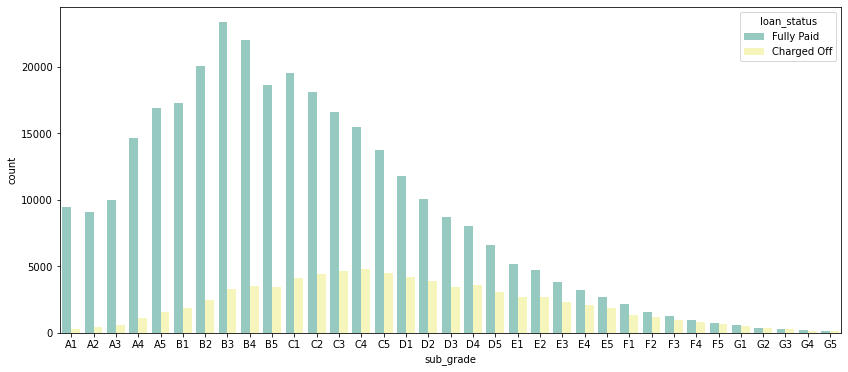

In [98]:
# redo with hue of loan_status
# looks like mean normal distribution for charged off is a worse grade
plt.figure(figsize=(14,6))
sorted_subgrades = sorted(df["sub_grade"].unique())
sns.countplot(x="sub_grade",data=df,order=sorted_subgrades,hue = "loan_status",palette="Set3")

**It looks like F and G subgrades don't get paid back that often. Isloate and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

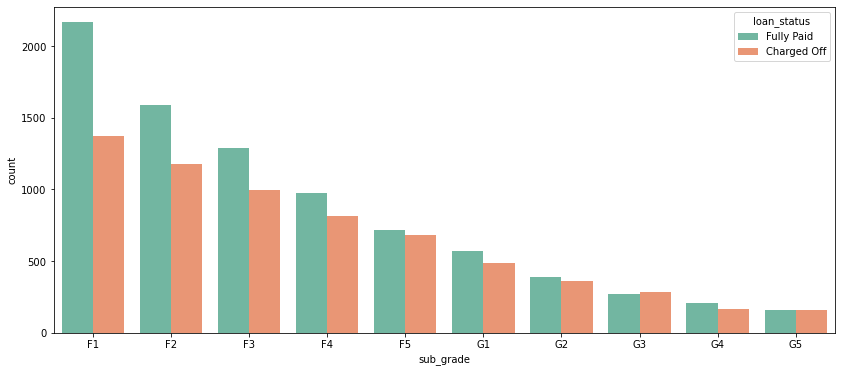

In [99]:
# redo previous plot with just subgrades g-f
# distribution is still very similar
f_g = df[(df["grade"] == "G") | (df["grade"] == "F")]
f_g_order = sorted(f_g["sub_grade"].unique())
plt.figure(figsize=(14,6))
sns.countplot(x="sub_grade",data=f_g,order=f_g_order,hue = "loan_status",palette="Set2")

**Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [100]:
# 2 types of loan_status
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [101]:
# apply 
# or could use map and do dictionary
df["loan_repaid"] = df["loan_status"].apply(lambda status: 1 if status == "Fully Paid" else 0)

**Check correlation between new column and rest of features**

<AxesSubplot:>

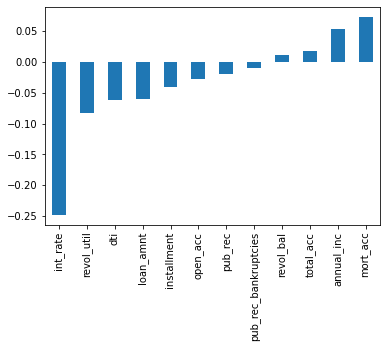

In [102]:
#CODE HERE
df.corr()["loan_repaid"][:-1].sort_values().plot(kind="bar")

#### Looks as if mor_acc and annual_inc most correlated

---
---
# Data PreProcessing / Feature Engineering

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [103]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data

**Explore missing data**

In [104]:

len(df)

396030

**Check columns with null values**

In [105]:
# Check cols with null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**emp_title,emp_length,title,mort_acc,revol_util and pub_rec_bankruptcies have nulls**


In [106]:
# Get null values as percentage of total values
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examine emp_title and emp_length**

In [107]:
print(feat_info("emp_title"))
print(feat_info("emp_length"))

The job title supplied by the Borrower when applying for the loan.*
None
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [108]:
# Unqiue job titles
df["emp_title"].nunique()

173105

In [109]:
df["emp_title"].value_counts()

Teacher                      4389
Manager                      4250
Registered Nurse             1856
RN                           1846
Supervisor                   1830
                             ... 
IMT supervisor                  1
MEADEN & MOORE LTD.             1
City of Suffolk                 1
Service Pump And Supply         1
Security Operations Chief       1
Name: emp_title, Length: 173105, dtype: int64

**Too many unique job titles to try to convert this to catagorize So  remove that emp_title column.**

In [110]:
# remove as too many differnent titeles
df.drop("emp_title",axis=1,inplace=True)

**Plot emp_length**

In [111]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [112]:
# dropna otherwise it gets fucked
sorted(df['emp_length'].dropna().unique(),key=lambda x: x[0])

['10+ years',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [113]:
sorted_vals = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

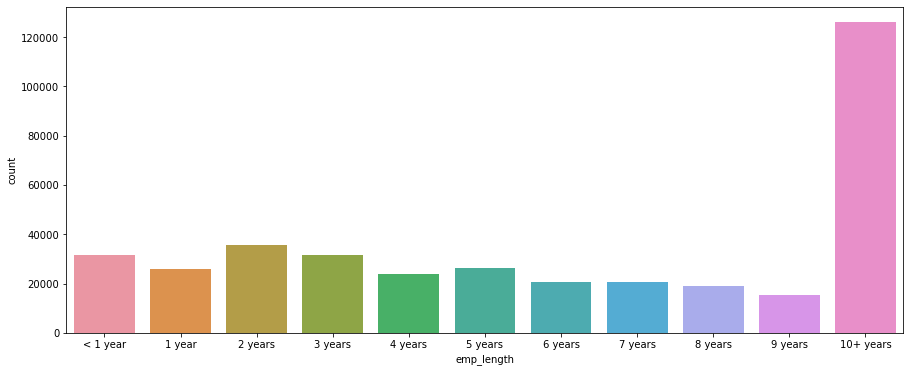

In [114]:
# plot emp_length
# looks like most are 10+year employees
plt.figure(figsize=(15,6))
sns.countplot(x="emp_length",data=df,order=sorted_vals)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

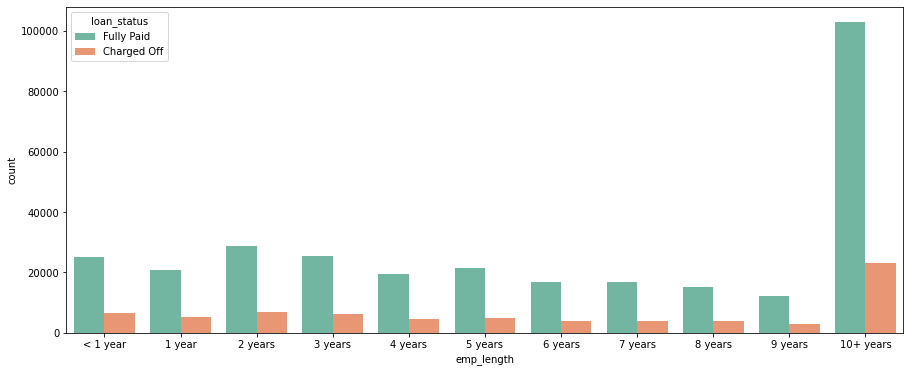

In [115]:
# Dosent really show much as the distibution looks similar
plt.figure(figsize=(15,6))
sns.countplot(x="emp_length",data=df,order=sorted_vals,hue="loan_status",palette="Set2")

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category.**

In [116]:
# Create series with emp_length and % chargeoffs per catagory
# total emp with loan repaid
emp_co = df[df["loan_repaid"] == 0].groupby("emp_length").count()["loan_repaid"]
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_repaid, dtype: int64

In [117]:
# all employess
emp = df.groupby("emp_length")["loan_repaid"].count()
emp

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_repaid, dtype: int64

In [118]:
#get toal percentage
emp_len = emp_co/emp
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_repaid, dtype: float64

<AxesSubplot:xlabel='emp_length'>

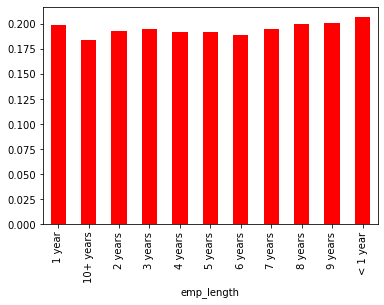

In [119]:
#plot the emp_lenght as a percentage of loan repaid
emp_len.plot(kind="bar",color="r")

**Charge off rates are extremely similar across all employment lengths. So we will drop the emp_length column.**

In [120]:
# dosent really show much so we can just drop feature
df.drop("emp_length",axis=1,inplace=True)

In [121]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column**

In [122]:

df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [123]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The columns are identical. So drop title column as it has some nulls!!**

In [124]:
# same thing pretty much so we can drop the titel column
df.drop("title",axis=1,inplace=True)


**Explore mort_acc**

In [125]:
# recheck what feature represents
feat_info("mort_acc")

Number of mortgage accounts.


In [126]:
# see most have 0 and then goes down as number increases
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**Find a way to try fill in null values. Check correlations and fill using mean of most correlated**

In [127]:
#check correlation with mort_acc
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc, which actually makes sense!!!!**

In [128]:
# group by total acc and get mean and mort accounts 
acc_mort_series = df.groupby("total_acc").mean()["mort_acc"]

**If there is a null. It will be filled in witht the mean value as per the series above showing the total_acc**

In [129]:
# df of all null values in mort
mort_null = df[df["mort_acc"].isnull()]
mort_null.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
22,4200.0,36 months,6.99,129.67,A,A3,OWN,24000.0,Not Verified,Jun-2011,...,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\nJenniferbury, AL 05113",1
25,6000.0,36 months,11.36,197.47,B,B5,RENT,46680.0,Not Verified,Apr-2010,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
32,3000.0,36 months,6.03,91.31,A,A1,OWN,64000.0,Source Verified,Oct-2011,...,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\nShaunbury, NH 22690",1
41,28000.0,60 months,19.91,312.04,E,E4,RENT,52000.0,Verified,Dec-2011,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0
62,5000.0,36 months,10.39,118.45,B,B4,RENT,66000.0,Not Verified,May-2008,...,0.0,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\nFPO AE 22690,1


In [130]:
# fill missing mort_acc with mean value corresponding to total acc a above
# so if NAN then if total_acc = 6 => fill value with .151 - as per above
# map out as per series above 
df["mort_acc"].fillna(mort_null["total_acc"].map(acc_mort_series),inplace=True)

In [131]:
#recehck nulls
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have nulls also, but they account for less than 0.5% of the total data. So we will just remove these rows**

In [132]:
# remove rows with other nulls as it is less than .5% of data
df.dropna(inplace=True)

In [133]:
# no nulls now yayy!!
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables


In [134]:
# check all features that are strings 
# call select_dtypes => use objects as they are strings
df.select_dtypes(include="object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')


### term feature

**Convert to int**

In [135]:
# convert term to 36 or 60 months
df["term"] = df["term"].map({" 36 months":36," 60 months":60})

In [136]:
df["term"].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [137]:
# drop grade feature as it overlaps with sub_grade 
df.drop("grade",axis=1,inplace=True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remove orignal subgrade col after**

In [138]:
# get dummy variables for subgrade
dummies = pd.get_dummies(df["sub_grade"],drop_first=True)
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# concat to main df  and drop sub_cat
df = pd.concat([df.drop("sub_grade",axis=1),dummies],axis=1)

In [140]:
#check cols again to make sure it worked
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [141]:
# recehck all string cols
df.select_dtypes(include="object").columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type, initial_list_status, purpose 
**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Set drop_first=True as it reults in duplicates if we dont and to drop the original columns.**

In [142]:
# create dummy variables as stated above
ver_dummies = pd.get_dummies(df["verification_status"],drop_first=True)
app_dummies = pd.get_dummies(df["application_type"],drop_first=True)
init_dummies = pd.get_dummies(df["initial_list_status"],drop_first=True)
purp_dummies = pd.get_dummies(df["purpose"],drop_first=True)

In [143]:
#concat the columns to the df and drop original rows
df = pd.concat([df,ver_dummies,app_dummies,init_dummies,purp_dummies],axis=1)

In [ ]:
#drop duplicate cols
df.drop(["verification_status","application_type","initial_list_status","purpose"],axis=1,inplace=True)

### home_ownership


In [152]:
#check different types using value counts 
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Set drop_first=True and to drop the original columns.**

In [160]:
#replace none and any with none
home_dummies = pd.get_dummies(df["home_ownership"].replace(["NONE","ANY"],"OTHER"),drop_first=True)
home_dummies.head()

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [166]:
# now concat with dataframe and drop original column
df = pd.concat([df.drop("home_ownership",axis=1),home_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

### address
**feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [171]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [177]:
# extract zipcode and put adress
df["zip_code"] = df["address"].apply(lambda address: address.split()[-1])
# check if it workded
df[['address',"zip_code"]].head()

,address,zip_code
0,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113
3,"823 Reid Ford\nDelacruzside, MA 00813",00813
4,"679 Luna Roads\nGreggshire, VA 11650",11650


In [178]:
# check how many zipcodes are present
df["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**Not many zip codes. THus convert ot dummy variable and concat to original df. Drop adress and zip code columns**

In [180]:
# create dummies
zip_dummies = pd.get_dummies(df["zip_code"],drop_first=True)

In [183]:
# concat and drop cols 
df = pd.concat([df.drop(["zip_code","address"],axis=1),zip_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [186]:
#drop issue_d
df.drop("issue_d",axis=1,inplace=True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [194]:
# convert to datetime obj and then just extract the year 
df["earliest_cr_line"] = pd.to_datetime(df['earliest_cr_line'])
df["earliest_cr_year"] = df["earliest_cr_line"].apply(lambda date: date.year)
df["earliest_cr_year"]

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [195]:
# drop the original column 
df.drop("earliest_cr_line",axis=1,inplace=True)

## Split Test and training data

In [196]:
from sklearn.model_selection import train_test_split

**Drop loan_status as we have the new loan_repaid col**

In [197]:
# drop loan_status
df.drop("loan_status",axis=1,inplace=True)

**Set X and y variables to the .values to convert to numpy array of the features and label.**

In [198]:
#Set X, y
X = df.drop("loan_repaid",axis=1).values
y = df["loan_repaid"].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [121]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**Perform a train/test split with test_size=0.2 and a random_state of 101**

In [201]:
#perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalize  the features
    Normalize as tensorlow model needs normalized features. 
    Use MinMaxScalar

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
# create scalar obj
scalar = MinMaxScaler()

In [204]:
# fit to training data oNLY then transform both test and training data
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Creating TensorFlow Model (ANN)


In [217]:
#import model, dense and droput layers and also early stopping callback to prevent overfitting
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [218]:
# have 78 features!!!! Thus using 78 nuerons for first layer then halving
len(df.columns) - 1

78


### Nueral network architecture
    Input layer: nuerons = number of incoming features = 78
    Hidden Layers(use 2) : Use half of 79 which is 39 and then half that for 19
    Output layer: 1 nueron as it is a binary classification

[NN selection Q](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) => Used to pick architecture
 - Note: if data linearly seperable, we might not need any hidden layers or even do a NN model
- One hidden layer is sufficient for the large majority of problems.
- the optimal size of the hidden layer is usually between the size of the input and size of the output layers'
In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [219]:
early_stop = EarlyStopping(monitor="val_loss",patience=10,mode="min")

In [222]:
# CODE HERE
model = Sequential()
# Dropout layer with .2 after each layer
#input layer - 78 nuerons and activation func =rectified linear unit
model.add(Dense(78,activation="relu"))
model.add(Dropout(.2))
#hidden layers 
model.add(Dense(39,activation="relu"))
model.add(Dropout(.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(.2))
#output layer - 1 neuron and sigmoid activation as classificationn problem
model.add(Dense(1,activation="sigmoid"))

In [223]:
# now compile model - adam optimzer and binary cross entropy as loss func
model.compile(optimizer="adam",loss="binary_crossentropy")

**Large training data so fit to 300 eppochs(dosent matter with early stopping) and use 256 batch size with callback of early stopping**

In [224]:
# Large training data so fit to 300 eppochs and use 256 batch size with callback of early stopping 
model.fit(x=X_train,y=y_train,batch_size=256,epochs=300,callbacks=[early_stop],validation_data=(X_test,y_test))

Epoch 1/300
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3011 - val_loss: 0.2646
Epoch 2/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2658 - val_loss: 0.2641
Epoch 3/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2631 - val_loss: 0.2622
Epoch 4/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2620 - val_loss: 0.2627
Epoch 5/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2609 - val_loss: 0.2617
Epoch 6/300
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2617
Epoch 7/300
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 8/300
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2598 - val_loss: 0.2614
Epoch 9/300
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2592 - val_loss: 0.2611
Epoch 10/300
1236/1236 [==============================] - 3s 3ms/step - l

### Stops at 33 epoochs!!! due to early stopping

In [225]:
# Save model 
model.save("Lending_Club_model.h5")

## Evaluating Model Performance

**plot loss vs val loss**

<AxesSubplot:>

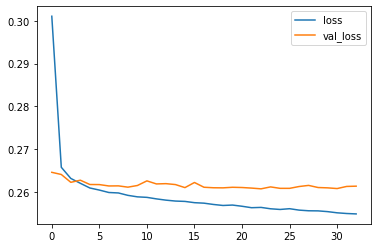

In [226]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Looks good and no overfitting as we can see!! => val loss flatened but not decreasing

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [227]:
#prediction from model 
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [228]:
#import confusion matrix and classifcation report 
from sklearn.metrics import classification_report,confusion_matrix

In [229]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [236]:
print(confusion_matrix(y_test,pred))

[[ 7006  8652]
 [  242 63144]]


In [239]:
# see inbalanced => only 20% not repaid
df["loan_repaid"].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [241]:
317696/len(df)

0.8038479931379817

**BY default the accarcy would be 80% if just preditcted loan repaid each time!!!!!!! Thus our 89% not too good!!** 
**F1-score .61 on 0, so avergae not amazing**

#### Okay performance as f1 score is .87 and .89% accuracy .
Looks like predicting lots of false posoitves!!! Bad recall for predicting they wont return loan => predicting yes they would pay back when they actuallu wont!!! this is kinda bad in this context as we want to focus more on recall and ensure we have less FPs Because, if a person wasnt going to pay loan back we want to make sure that happens!!!!

**Try on example customer !!**

In [242]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [247]:
# convert to numpy array and normalzie  to put into model 
new_customer = new_customer.values.reshape(-1,78)

In [248]:
new_customer = scalar.transform(new_customer)
model.predict_classes(new_customer)

array([[1]], dtype=int32)

**Predicts yes they will pay back**
 - lets check and see if they actually do**

In [250]:
df.iloc[random_ind]["loan_repaid"]

1.0

**Yayyy so guessed correctly**

# The End
    Future improvements: tune hyperparameters of NN further to achieve better result